# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.2

In the second exercise we consider a polynomial such as $ 4 - 3x -2x^2 + 3x^3$ for $x \in [-1,1]$.
Through this notebook we explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

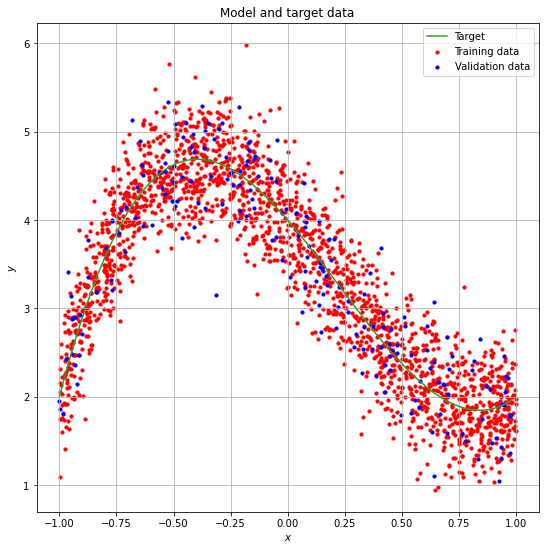

In [2]:
def f(x):
    return 4 - 3*x -2*x*x + 3*x**3

ntrain=2000
nvalid=200

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 0.4 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# plot training and target dataset
plt.figure(figsize=(9,9))
plt.plot(x_valid, y_target, color = "C2", label="Target")
plt.title("Model and target data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(x_train, y_train, color='red', s=10, label="Training data")
plt.scatter(x_valid, y_valid, color='blue', s=10, label="Validation data")
plt.grid(True); 
plt.legend()
plt.show()

First of all we need to create our own model and to do this we need to have an idea of how many parameters are needed to get a good result.
To do this we can develop a function that builds different models by gradually adding layers.
In particular, we create a model that adds layers of different sizes and uses the relu as an activation function.

In [3]:
def createModel(layers):
    model = tf.keras.Sequential()
    model.add(Dense(4, input_shape=(1,), activation = "relu"))
    for i in range(layers):
        model.add(Dense(4*(i+1), activation = "relu"))
    model.add(Dense(4, activation = "relu"))
    model.add(Dense(1))
    return model

created_models = [createModel(layers) for layers in range(6)]

for model in created_models:
    
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    # get a summary of our composed model
    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
______________________________________

In [4]:
histories = [model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid)) for model in created_models]

Epoch 1/100
63/63 [==============================] - 1s 8ms/step - loss: 2.4620 - mse: 2.4620 - val_loss: 0.8910 - val_mse: 0.8910
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.7939 - mse: 0.7939 - val_loss: 0.7925 - val_mse: 0.7925
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7503 - mse: 0.7503 - val_loss: 0.7675 - val_mse: 0.7675
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7354 - mse: 0.7354 - val_loss: 0.7626 - val_mse: 0.7626
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7225 - mse: 0.7225 - val_loss: 0.7520 - val_mse: 0.7520
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7175 - mse: 0.7175 - val_loss: 0.7728 - val_mse: 0.7728
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7177 - mse: 0.7177 - val_loss: 0.7654 - val_mse: 0.7654
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7165 - m

Epoch 63/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7147 - mse: 0.7147 - val_loss: 0.7419 - val_mse: 0.7419
Epoch 64/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7129 - mse: 0.7129 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 65/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7156 - mse: 0.7156 - val_loss: 0.7426 - val_mse: 0.7426
Epoch 66/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7136 - mse: 0.7136 - val_loss: 0.7732 - val_mse: 0.7732
Epoch 67/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7143 - mse: 0.7143 - val_loss: 0.7468 - val_mse: 0.7468
Epoch 68/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7172 - mse: 0.7172 - val_loss: 0.7409 - val_mse: 0.7409
Epoch 69/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7138 - mse: 0.7138 - val_loss: 0.7515 - val_mse: 0.7515
Epoch 70/100
63/63 [==============================] - 0s 1ms/step - loss: 0.

63/63 [==============================] - 0s 1ms/step - loss: 0.1765 - mse: 0.1765 - val_loss: 0.1776 - val_mse: 0.1776
Epoch 88/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1677 - mse: 0.1677 - val_loss: 0.1788 - val_mse: 0.1788
Epoch 89/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1750 - mse: 0.1750 - val_loss: 0.1905 - val_mse: 0.1905
Epoch 90/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1750 - mse: 0.1750 - val_loss: 0.1803 - val_mse: 0.1803
Epoch 91/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1705 - mse: 0.1705 - val_loss: 0.1833 - val_mse: 0.1833
Epoch 92/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1684 - mse: 0.1684 - val_loss: 0.1757 - val_mse: 0.1757
Epoch 93/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1730 - mse: 0.1730 - val_loss: 0.2250 - val_mse: 0.2250
Epoch 94/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1669 - mse: 0

63/63 [==============================] - 0s 1ms/step - loss: 0.2073 - mse: 0.2073 - val_loss: 0.2166 - val_mse: 0.2166
Epoch 12/100
63/63 [==============================] - 0s 1ms/step - loss: 0.2065 - mse: 0.2065 - val_loss: 0.2010 - val_mse: 0.2010
Epoch 13/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1915 - mse: 0.1915 - val_loss: 0.1890 - val_mse: 0.1890
Epoch 14/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1849 - mse: 0.1849 - val_loss: 0.1947 - val_mse: 0.1947
Epoch 15/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1825 - mse: 0.1825 - val_loss: 0.2026 - val_mse: 0.2026
Epoch 16/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1902 - mse: 0.1902 - val_loss: 0.2594 - val_mse: 0.2594
Epoch 17/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1891 - mse: 0.1891 - val_loss: 0.1778 - val_mse: 0.1778
Epoch 18/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1704 - mse: 0

63/63 [==============================] - 0s 1ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.1783 - val_mse: 0.1783
Epoch 36/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1648 - mse: 0.1648 - val_loss: 0.2036 - val_mse: 0.2036
Epoch 37/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.1709 - val_mse: 0.1709
Epoch 38/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1642 - mse: 0.1642 - val_loss: 0.1720 - val_mse: 0.1720
Epoch 39/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1696 - mse: 0.1696 - val_loss: 0.2038 - val_mse: 0.2038
Epoch 40/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1660 - mse: 0.1660 - val_loss: 0.1752 - val_mse: 0.1752
Epoch 41/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1613 - mse: 0.1613 - val_loss: 0.1784 - val_mse: 0.1784
Epoch 42/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1626 - mse: 0

63/63 [==============================] - 0s 1ms/step - loss: 0.1613 - mse: 0.1613 - val_loss: 0.1702 - val_mse: 0.1702
Epoch 60/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1614 - mse: 0.1614 - val_loss: 0.1811 - val_mse: 0.1811
Epoch 61/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1604 - mse: 0.1604 - val_loss: 0.1713 - val_mse: 0.1713
Epoch 62/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1604 - mse: 0.1604 - val_loss: 0.2198 - val_mse: 0.2198
Epoch 63/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.1696 - val_mse: 0.1696
Epoch 64/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1600 - mse: 0.1600 - val_loss: 0.1750 - val_mse: 0.1750
Epoch 65/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1698 - val_mse: 0.1698
Epoch 66/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1583 - mse: 0

In [5]:
# evaluate model
scores_v = [model.evaluate(x_valid, y_valid, batch_size=32, verbose=1) for model in created_models]

# print performance: validation
for i in range(len(created_models)):
    print()
    print('Test loss:', scores_v[i])

7/7 [==============================] - 0s 2ms/step - loss: 0.1722 - mse: 0.1722

Test loss: [0.7569354176521301, 0.7569354176521301]

Test loss: [0.18181076645851135, 0.18181076645851135]

Test loss: [0.17021794617176056, 0.17021794617176056]

Test loss: [0.1738312542438507, 0.1738312542438507]

Test loss: [0.18011949956417084, 0.18011949956417084]

Test loss: [0.17221465706825256, 0.17221465706825256]


In [7]:
# evaluate model with the exact curve
scores_t = [model.evaluate(x_valid, y_target, batch_size=32, verbose=1) for model in created_models]

# print performance: target
for i in range(len(created_models)):
    print()
    print('Test loss:', scores_t[i])

7/7 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026

Test loss: [0.6484816074371338, 0.6484816074371338]

Test loss: [0.013369516469538212, 0.013369516469538212]

Test loss: [0.004751898813992739, 0.004751898813992739]

Test loss: [0.003506334964185953, 0.003506334964185953]

Test loss: [0.008116203360259533, 0.008116203360259533]

Test loss: [0.0026466173585504293, 0.0026466173585504293]


We can observe that that for increasing number of parameters, after a first decrease, the loss oscillates around a given value. For this reason, it does not seem necessary to arrive at an exaggerated number of parameters. The polynomial in question turns out to be fitted with precision even with a number of parameters in the hundreds. 

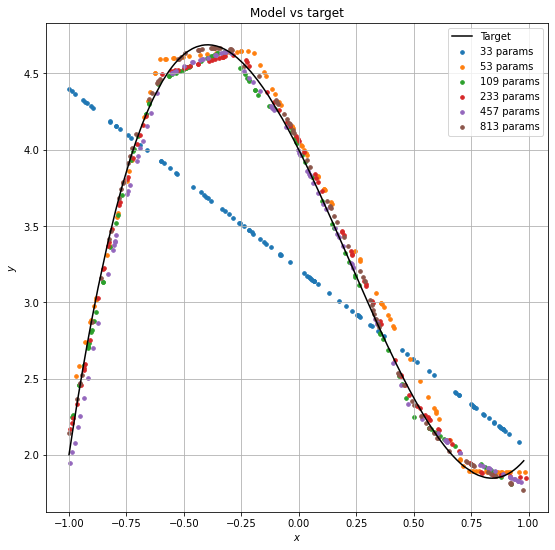

In [19]:
plt.figure(figsize=(9,9))
x_vec = [np.random.uniform(-1, 1, 100) for i in range(len(created_models))]
y_vec = [created_models[i].predict(x_vec[i]) for i in range(len(created_models))]
x_out_vec = [np.random.uniform(-2, 2, 100) for i in range(len(created_models))]
y_out_vec = [created_models[i].predict(x_out_vec[i]) for i in range(len(created_models))]

plt.plot(x_valid, y_target, label="Target", color="black")
for i in range(len(created_models)):
    plt.scatter(x_vec[i], y_vec[i], label=str(created_models[i].count_params())+" params", s=13)

plt.title('Model vs target')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.legend()
plt.show()

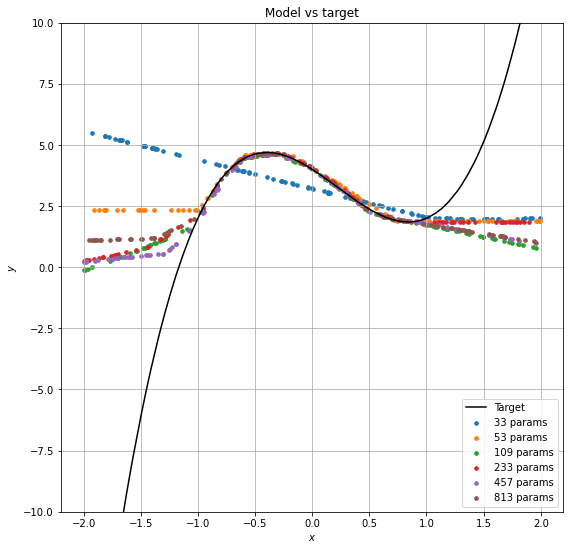

In [18]:
plt.figure(figsize=(9,9))
x_out_t = np.random.uniform(-2, 2, 200)
x_out_t.sort()
plt.plot(x_out_t, f(x_out_t), label="Target", color="black")
plt.ylim(-10,10)

for i in range(len(created_models)):
    plt.scatter(x_out_vec[i], y_out_vec[i], label=str(created_models[i].count_params())+" params", s=13)

plt.title('Model vs target')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.legend()
plt.show()

Now that we inspected some different cases, varying the number of layers and the number of neurons per layer, we can change the activation function.
In particuar we decide to fix the model with 109 parameters and use the "tanh" activation function.

In [33]:
new_model = tf.keras.Sequential()
new_model.add(Dense(4, input_shape=(1,), activation="tanh"))
new_model.add(Dense(4, activation="tanh"))
new_model.add(Dense(8, activation="tanh"))
new_model.add(Dense(4, activation="tanh"))
new_model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
new_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
new_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_60 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 5         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [34]:
new_history = new_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 2.8360 - mse: 2.8360 - val_loss: 0.9454 - val_mse: 0.9454
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6461 - mse: 0.6461 - val_loss: 0.4830 - val_mse: 0.4830
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4262 - mse: 0.4262 - val_loss: 0.4332 - val_mse: 0.4332
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3949 - mse: 0.3949 - val_loss: 0.4109 - val_mse: 0.4109
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3693 - mse: 0.3693 - val_loss: 0.3842 - val_mse: 0.3842
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3392 - mse: 0.3392 - val_loss: 0.3498 - val_mse: 0.3498
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3090 - mse: 0.3090 - val_loss: 0.3136 - val_mse: 0.3136
Epoch 8/50
63/63 [==============================] - 0s 1ms/step - loss: 0.2806 - mse: 0.28

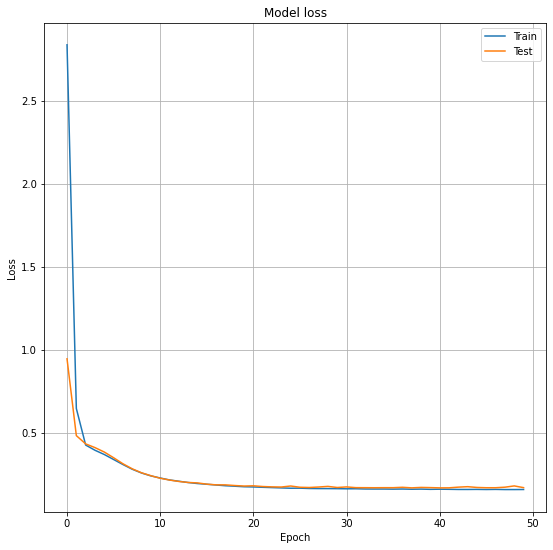

In [35]:
plt.figure(figsize=(9,9))
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

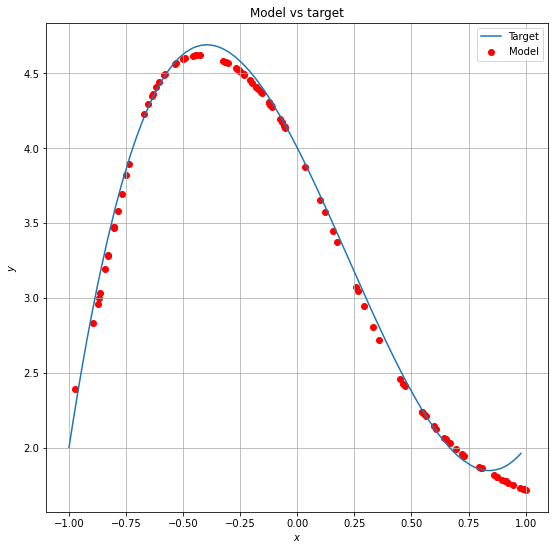

Final training data loss:  0.15858133137226105
Final validation data loss:  0.1698433756828308


In [39]:
plt.figure(figsize=(9,9))
x_p = np.random.uniform(-1, 1, 100)
y_p = new_model.predict(x_p)
plt.scatter(x_p, y_p,color='r', label="Model")
plt.plot(x_valid, y_target, label="Target")
plt.title('Model vs target')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.legend()

plt.show()

print("Final training data loss: ", new_history.history['loss'][-1])
print("Final validation data loss: ", new_history.history['val_loss'][-1])

Now we just have to try different optimizers. The first step we take is to implement the stocastic gradient descent by changing the value of the learning rate ($ = 0.08$) and introducing the moment ($= 0.8$).

In [49]:
new_model = tf.keras.Sequential()
new_model.add(Dense(4, input_shape=(1,), activation="tanh"))
new_model.add(Dense(4, activation="tanh"))
new_model.add(Dense(8, activation="tanh"))
new_model.add(Dense(4, activation="tanh"))
new_model.add(Dense(1))

tf.keras.optimizers.SGD(
    learning_rate=0.08, momentum=0.8, nesterov=False, name="SGD")
# compile the model choosing optimizer, loss and metrics objects
new_model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
# get a summary of our composed model
new_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_79 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_81 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 5         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [50]:
new_history = new_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
63/63 [==============================] - 1s 7ms/step - loss: 1.6885 - mse: 1.6885 - val_loss: 0.4958 - val_mse: 0.4958
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4472 - mse: 0.4472 - val_loss: 0.4655 - val_mse: 0.4655
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4327 - mse: 0.4327 - val_loss: 0.4599 - val_mse: 0.4599
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4236 - mse: 0.4236 - val_loss: 0.4460 - val_mse: 0.4460
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4117 - mse: 0.4117 - val_loss: 0.4341 - val_mse: 0.4341
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.3979 - mse: 0.3979 - val_loss: 0.4175 - val_mse: 0.4175
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.3809 - mse: 0.3809 - val_loss: 0.4001 - val_mse: 0.4001
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.3601 - mse: 0.36

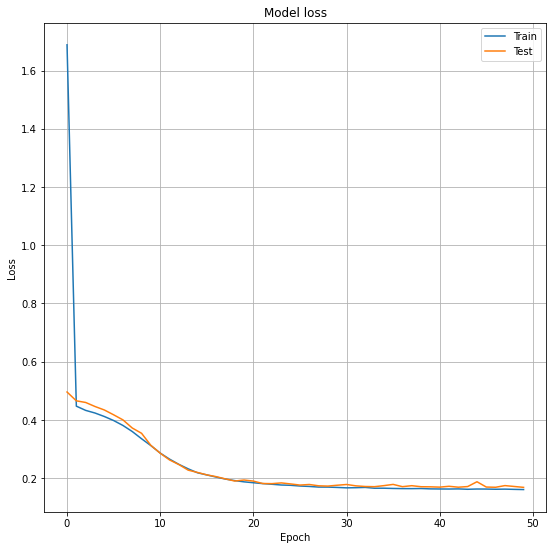

In [51]:
plt.figure(figsize=(9,9))
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

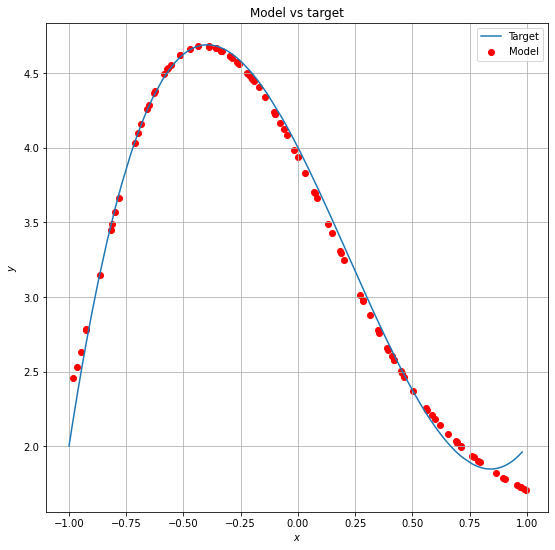

Final training data loss:  0.16070090234279633
Final validation data loss:  0.16825014352798462


In [52]:
plt.figure(figsize=(9,9))
x_p = np.random.uniform(-1, 1, 100)
y_p = new_model.predict(x_p)
plt.scatter(x_p, y_p,color='r', label="Model")
plt.plot(x_valid, y_target, label="Target")
plt.title('Model vs target')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.legend()

plt.show()

print("Final training data loss: ", new_history.history['loss'][-1])
print("Final validation data loss: ", new_history.history['val_loss'][-1])

Next, let's try using "adam".

In [57]:
new_model = tf.keras.Sequential()
new_model.add(Dense(4, input_shape=(1,), activation="tanh"))
new_model.add(Dense(4, activation="tanh"))
new_model.add(Dense(8, activation="tanh"))
new_model.add(Dense(4, activation="tanh"))
new_model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
new_model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# get a summary of our composed model
new_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_89 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_90 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_91 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 5         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [58]:
new_history = new_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
63/63 [==============================] - 1s 7ms/step - loss: 10.3224 - mse: 10.3224 - val_loss: 8.5248 - val_mse: 8.5248
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 6.2138 - mse: 6.2138 - val_loss: 4.5021 - val_mse: 4.5021
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 3.2884 - mse: 3.2884 - val_loss: 2.5563 - val_mse: 2.5563
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 2.0385 - mse: 2.0385 - val_loss: 1.7422 - val_mse: 1.7422
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 1.4616 - mse: 1.4616 - val_loss: 1.2934 - val_mse: 1.2934
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 1.0986 - mse: 1.0986 - val_loss: 1.0077 - val_mse: 1.0077
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.8867 - mse: 0.8867 - val_loss: 0.8435 - val_mse: 0.8435
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7612 - mse: 0.

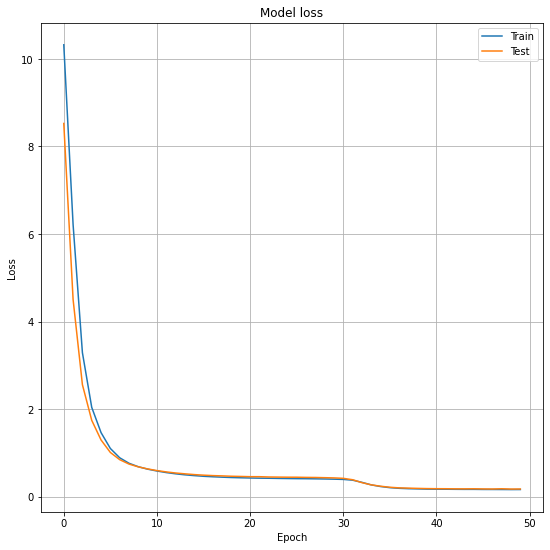

In [59]:
plt.figure(figsize=(9,9))
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

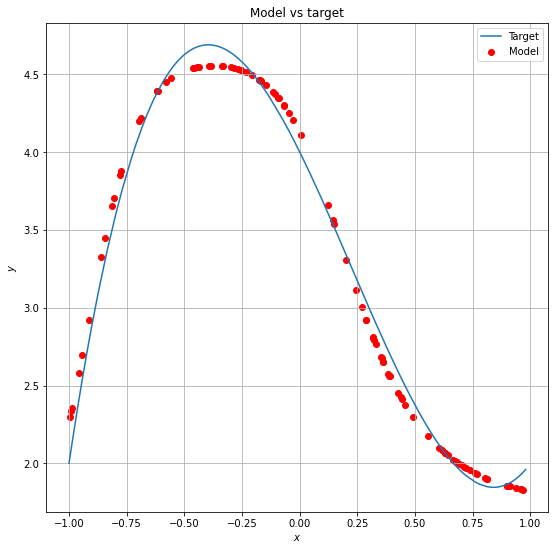

Final training data loss:  0.16096177697181702
Final validation data loss:  0.17323021590709686


In [60]:
plt.figure(figsize=(9,9))
x_p = np.random.uniform(-1, 1, 100)
y_p = new_model.predict(x_p)
plt.scatter(x_p, y_p,color='r', label="Model")
plt.plot(x_valid, y_target, label="Target")
plt.title('Model vs target')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.legend()

plt.show()

print("Final training data loss: ", new_history.history['loss'][-1])
print("Final validation data loss: ", new_history.history['val_loss'][-1])

And finally we try "adamax".

In [69]:
new_model = tf.keras.Sequential()
new_model.add(Dense(4, input_shape=(1,), activation="tanh"))
new_model.add(Dense(4, activation="tanh"))
new_model.add(Dense(8, activation="tanh"))
new_model.add(Dense(4, activation="tanh"))
new_model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
new_model.compile(optimizer='adamax', loss='mse', metrics=['mse'])
# get a summary of our composed model
new_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 4)                 8         
_________________________________________________________________
dense_104 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_105 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_106 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 5         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [70]:
new_history = new_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
63/63 [==============================] - 1s 8ms/step - loss: 9.2888 - mse: 9.2888 - val_loss: 7.1109 - val_mse: 7.1109
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 4.7787 - mse: 4.7787 - val_loss: 2.9845 - val_mse: 2.9845
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 1.8524 - mse: 1.8524 - val_loss: 1.2396 - val_mse: 1.2396
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.9203 - mse: 0.9203 - val_loss: 0.7937 - val_mse: 0.7937
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6711 - mse: 0.6711 - val_loss: 0.6422 - val_mse: 0.6422
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5179 - mse: 0.5179 - val_loss: 0.5327 - val_mse: 0.5327
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4920 - mse: 0.49

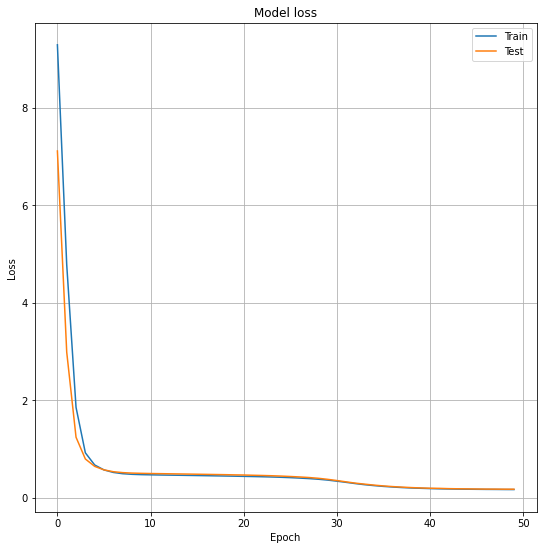

In [71]:
plt.figure(figsize=(9,9))
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

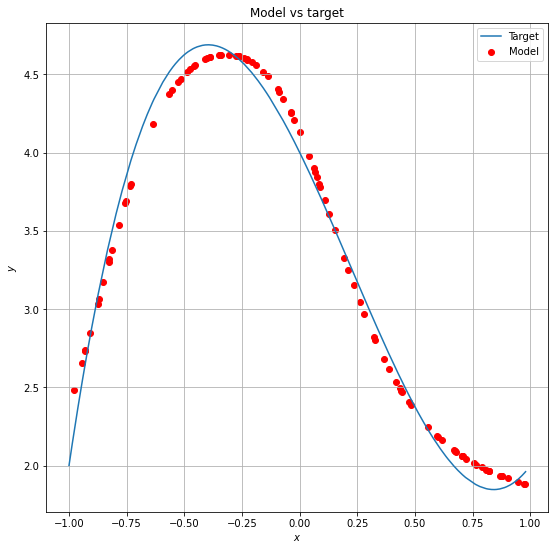

Final training data loss:  0.16653819382190704
Final validation data loss:  0.17390763759613037


In [72]:
plt.figure(figsize=(9,9))
x_p = np.random.uniform(-1, 1, 100)
y_p = new_model.predict(x_p)
plt.scatter(x_p, y_p,color='r', label="Model")
plt.plot(x_valid, y_target, label="Target")
plt.title('Model vs target')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.legend()

plt.show()

print("Final training data loss: ", new_history.history['loss'][-1])
print("Final validation data loss: ", new_history.history['val_loss'][-1])

In conclusion, after having performed all these tests, we can summarize the work by making some considerations on the results obtained.
First of all we observed that, although the fit is good in the range $ [- 1.1] $, as soon as you exit the latter, the model is no longer able to reproduce the behavior of the target function.

As for the different models used, we noticed that to fit a polynomial function like the one under analysis, not very many parameters are needed; in fact the loss fluctuates around a typical value (equal or near to the variance $\sigma^2$ of the sample) as the number of parameters increases. This is an expected behavior since we have introduced a Gaussian noise $ \sigma = 0.4 $ from the beginning.
The best result is obtained with a network that has the hyperbolic tangent as an activation function and the modified stocastic gradient descent as an optimizer.
The reason why this combination leads to the best result is to be found in the compatibility of the hyperbolic tangent with differentiable functions such as the polynomial in analysis and in the validity of the stocastic gradient descent as an optimizer.
In fact, models that use a different optimizers present a sort of shift with respect to the objective function, while models that use the "relu" as an activation function always struggle to fit the curves of the polynomial.